In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [7]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from numpy.fft import fft2, ifft2, fftshift, ifftshift
import numpy as np

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



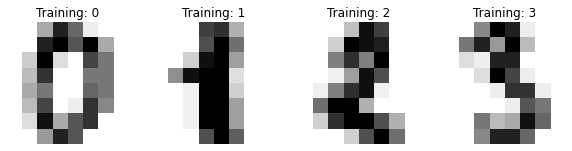

In [12]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [10]:
def display_2(im_1, title_1, im_2, title_2):
    """
    Displays two images side by side; typically, an image and its Fourier transform.
    """
    plt.figure(figsize=(12,6))                    # Rectangular blackboard
    plt.subplot(1,2,1) ; plt.title(title_1)       # 1x2 waffle plot, 1st cell
    plt.imshow(im_1, cmap="gray")                 # Auto-equalization
    plt.subplot(1,2,2) ; plt.title(title_2)       # 1x2 waffle plot, 2nd cell
    plt.imshow(im_2, cmap="gray", vmin=-7, vmax=15)       

In [17]:
def Fourier_bandpass(fI, fmin, fmax) :
    """
    Truncates a Fourier Transform fI, before reconstructing a bandpassed image.
    """
    Y, X = np.mgrid[:fI.shape[0], :fI.shape[1]]  # Horizontal and vertical gradients
    radius = (X - fI.shape[0]/2) ** 2 \
           + (Y - fI.shape[1]/2) ** 2        # Squared distance to the middle point
    radius = ifftshift( np.sqrt(radius) )    # Reshape to be fft-compatible

    
    fI_band = fI.copy()               # Create a copy of the Fourier transform
    fI_band[ radius <=fmin ] = 0      # Remove all the low frequencies
    fI_band[ radius > fmax ] = 0      # Remove all the high frequencies
    I_band = np.real(ifft2(fI_band))  # Invert the new transform...

    #display_2( I_band, "Image",          # And display
               #fftshift( np.log(1e-7 + abs(fI_band)) ), "Fourier Transform" )
    print(I_band)

[[-4.59375 -4.59375  0.40625  8.40625  4.40625 -3.59375 -4.59375 -4.59375]
 [-4.59375 -4.59375  8.40625 10.40625  5.40625 10.40625  0.40625 -4.59375]
 [-4.59375 -1.59375 10.40625 -2.59375 -4.59375  6.40625  3.40625 -4.59375]
 [-4.59375 -0.59375  7.40625 -4.59375 -4.59375  3.40625  3.40625 -4.59375]
 [-4.59375  0.40625  3.40625 -4.59375 -4.59375  4.40625  3.40625 -4.59375]
 [-4.59375 -0.59375  6.40625 -4.59375 -3.59375  7.40625  2.40625 -4.59375]
 [-4.59375 -2.59375  9.40625  0.40625  5.40625  7.40625 -4.59375 -4.59375]
 [-4.59375 -4.59375  1.40625  8.40625  5.40625 -4.59375 -4.59375 -4.59375]]
[[-4.890625 -4.890625 -4.890625  7.109375  8.109375  0.109375 -4.890625
  -4.890625]
 [-4.890625 -4.890625 -4.890625  6.109375 11.109375  4.109375 -4.890625
  -4.890625]
 [-4.890625 -4.890625 -1.890625 10.109375 11.109375  1.109375 -4.890625
  -4.890625]
 [-4.890625  2.109375 10.109375 11.109375 11.109375 -2.890625 -4.890625
  -4.890625]
 [-4.890625 -4.890625 -3.890625 11.109375 11.109375 -1.8906

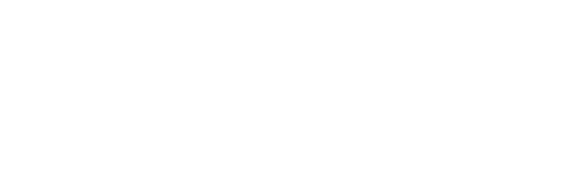

In [18]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    image_fft = fft2(image)
    Fourier_bandpass(image_fft, 0, 50)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()